# Análisis numérico

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leer el conjunto de datos

In [2]:
data = pd.read_csv('Data/train.csv')
data.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Reconocimiento de tipo de datos

In [3]:
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [4]:
# Convertir los tipos de datos a cadenas para evitar problemas de comparación
dtypes_grouped = data.columns.to_series().groupby(data.dtypes.apply(str)).apply(list)
group_keys = dtypes_grouped.keys()

# Imprimir la cantidad de columnas por tipo de dato
for key in group_keys:
    print(f'El tipo de dato {key} tiene un total de {len(dtypes_grouped[key])} variables')

El tipo de dato float64 tiene un total de 65 variables
El tipo de dato int64 tiene un total de 41 variables
El tipo de dato object tiene un total de 16 variables


In [5]:
# Crear un diccionario para almacenar las variables y su cantidad de valores únicos
leng_dict = {}

for var in data.columns:
    if len(data[var].unique()) < 15:
        leng_dict[var] = len(data[var].unique())

# Convertir el diccionario en un DataFrame
leng_df = pd.DataFrame(list(leng_dict.items()), columns=['Variable', 'Unique_Count'])

# Ordenar el DataFrame de manera descendente por 'Unique_Count'
leng_df_sorted = leng_df.sort_values(by='Unique_Count', ascending=False)

# Mostrar el DataFrame ordenado
leng_df_sorted.head(4)

,Variable,Unique_Count
54,AMT_REQ_CREDIT_BUREAU_QRT,12
29,DEF_30_CNT_SOCIAL_CIRCLE,11
53,AMT_REQ_CREDIT_BUREAU_WEEK,10
52,AMT_REQ_CREDIT_BUREAU_DAY,10


## Cambio de tipo de datos

Acá decidimos convertir el tipo de datos a `category` para las variables que eran `object` o directamente tenian menos de 12 valores únicos.

In [6]:
for var in data.columns:
    if len(data[var].unique()) <= 12:
        data[var] = data[var].astype('category')
    elif data[var].dtypes == 'object':
        data[var] = data[var].astype('category')
    else:
        data[var] = data[var].astype('float64')


In [7]:
# Convertir los tipos de datos a cadenas para evitar problemas de comparación
dtypes_grouped = data.columns.to_series().groupby(data.dtypes.apply(str)).apply(list)
group_keys = dtypes_grouped.keys()

# Imprimir la cantidad de columnas por tipo de dato
for key in group_keys:
    print(f'El tipo de dato {key} tiene un total de {len(dtypes_grouped[key])} variables')


El tipo de dato category tiene un total de 57 variables
El tipo de dato float64 tiene un total de 65 variables


## Análisis univariado

### Pruebas de normalidad

In [8]:
from scipy.stats import shapiro

numeric_cols = dtypes_grouped[group_keys[1]]

In [9]:
# Crear una lista para almacenar los resultados
results = []

# Iterar sobre cada columna numérica
for col in numeric_cols:
    # Realizar la prueba de normalidad Shapiro-Wilk
    _, p_value = shapiro(data[col])
    
    # Determinar si es normal o no
    normality = "Normal" if p_value >= 0.05 else "-"
    
    # Agregar el resultado a la lista
    results.append({'Variable': col, 'Normalidad': normality})

# Convertir la lista de resultados a un DataFrame
normality_results = pd.DataFrame(results)

normality_results.head(4)

/home/sebastian/miniconda3/envs/transmilenio/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 307511.
  res = hypotest_fun_out(*samples, **kwds)


,Variable,Normalidad
0,SK_ID_CURR,-
1,CNT_CHILDREN,-
2,AMT_INCOME_TOTAL,-
3,AMT_CREDIT,-


Cómo podemos ver ninguna variable es reconocida como normal, bajo la prueba de Skapiro-Wilk

In [10]:
normality_results[normality_results["Normalidad"] != '-']

,Variable,Normalidad


### Visualización

#### Sobre cliente

Acá van las variables cuya descripción es "el cliente tiene...", o describe al cliente en algún aspecto

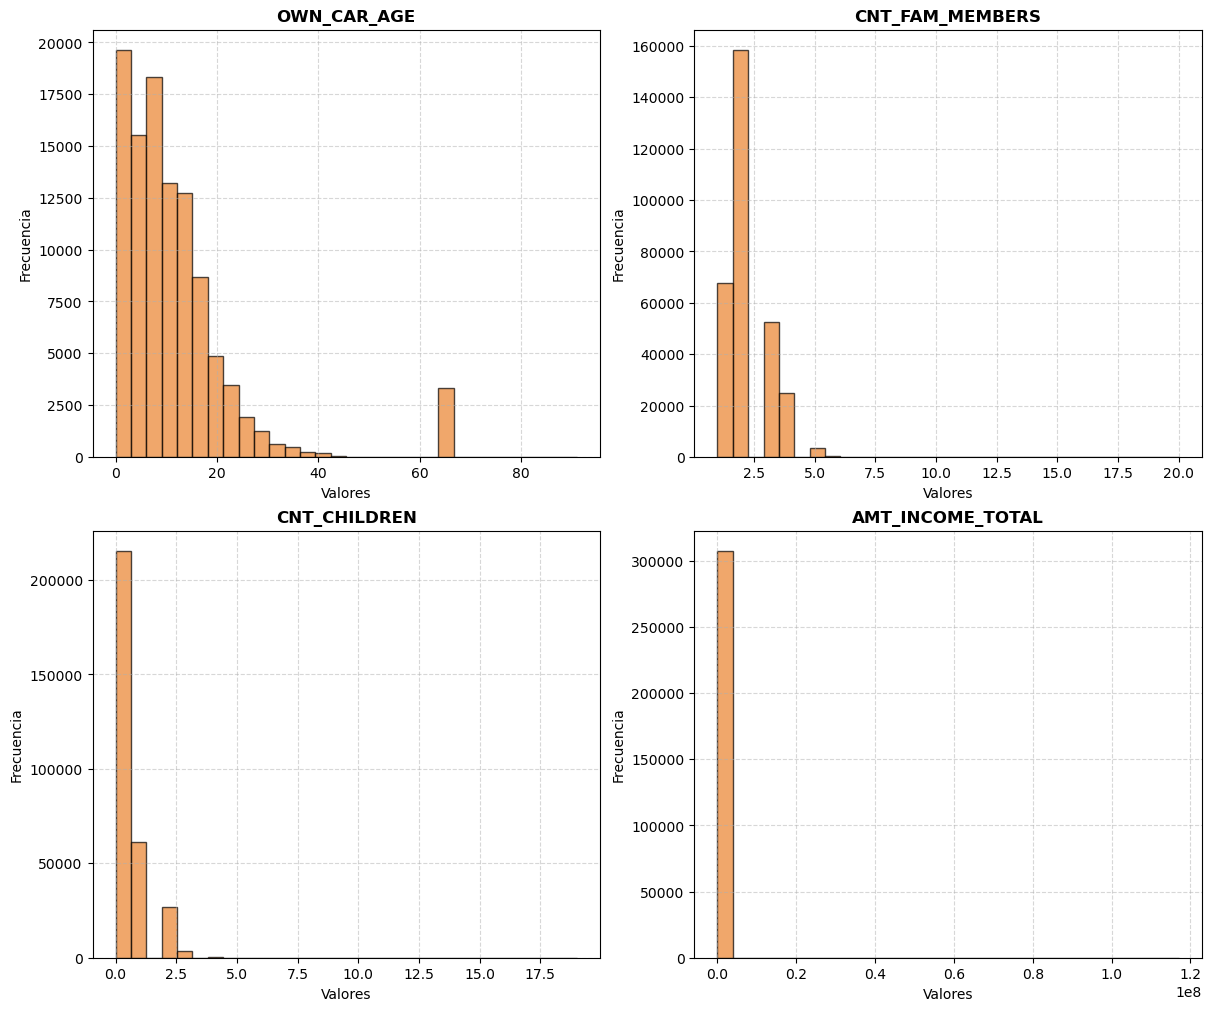

In [11]:
# Lista de variables a graficar
variables = [
    "OWN_CAR_AGE",
    "CNT_FAM_MEMBERS",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL"
]

# Crear la figura y los ejes (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, variables):
    ax.hist(data[var], bins=30, color="#EA822D", alpha=0.7, edgecolor="black")
    ax.set_title(var, fontsize=12, fontweight="bold")  # Título con el nombre de la variable
    ax.set_xlabel("Valores", fontsize=10)  # Etiqueta para el eje X
    ax.set_ylabel("Frecuencia", fontsize=10)  # Etiqueta para el eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Cuadrícula para estética

# Mostrar la figura
plt.show()

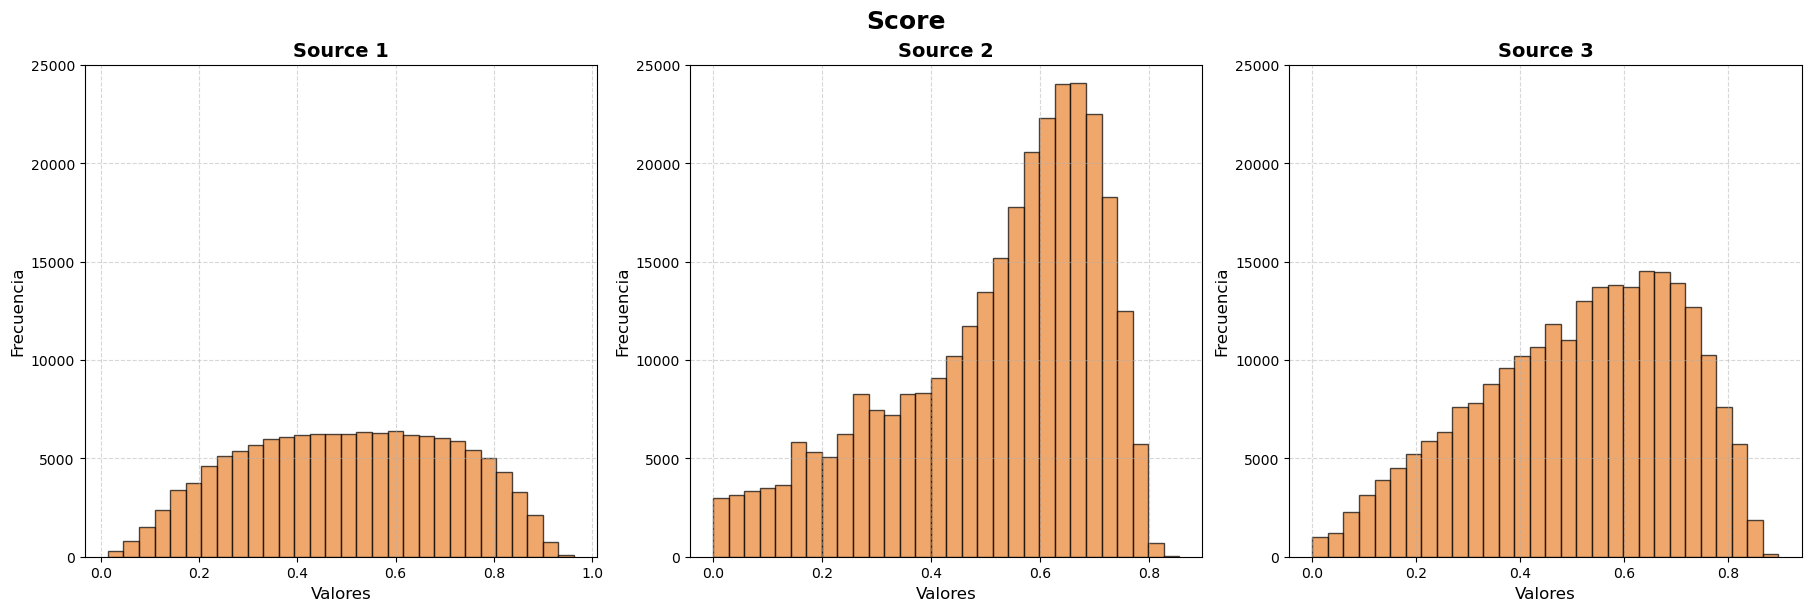

In [12]:
# Lista de variables a graficar
variables = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]

# Crear figura y ejes (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Ajustar el suptítulo
fig.suptitle('Score', fontsize=18, fontweight='bold')

# Iterar sobre cada variable y su respectivo eje
for ax, var, i in zip(axes, variables, range(1, 4)):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Source {i}", fontsize=14, fontweight="bold")  # Título personalizado
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.set_ylim(0, 25000)  # Establecer límites en el eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

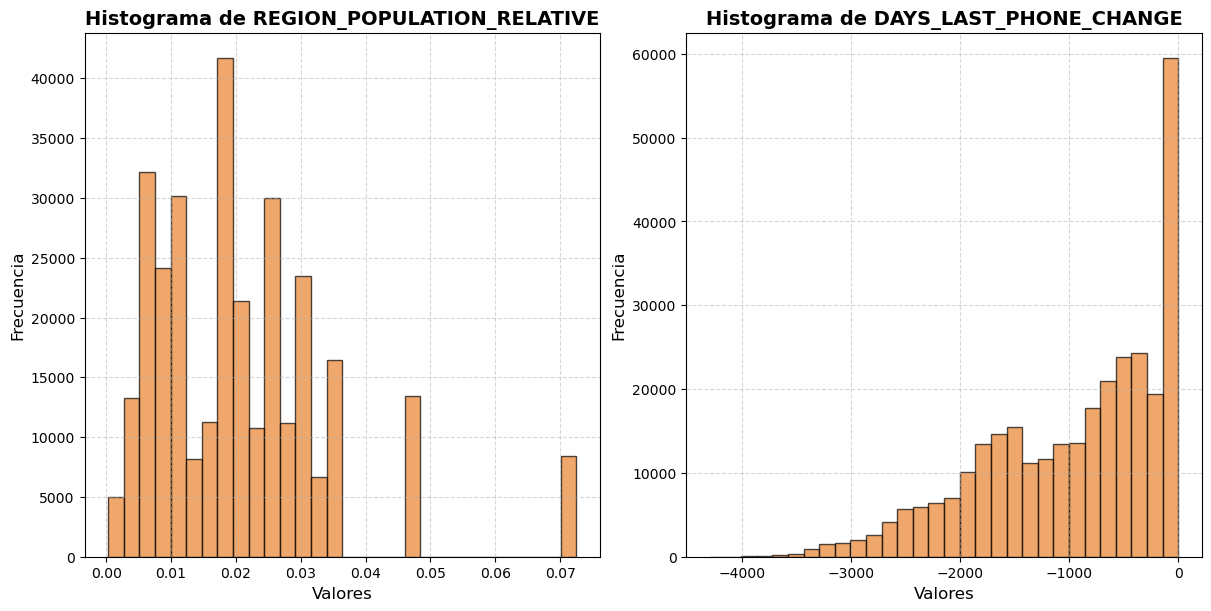

In [13]:
# Variables: REGION_POPULATION_RELATIVE y DAYS_LAST_PHONE_CHANGE
variables = ["REGION_POPULATION_RELATIVE", "DAYS_LAST_PHONE_CHANGE"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

#### Información de donde vive el cliente

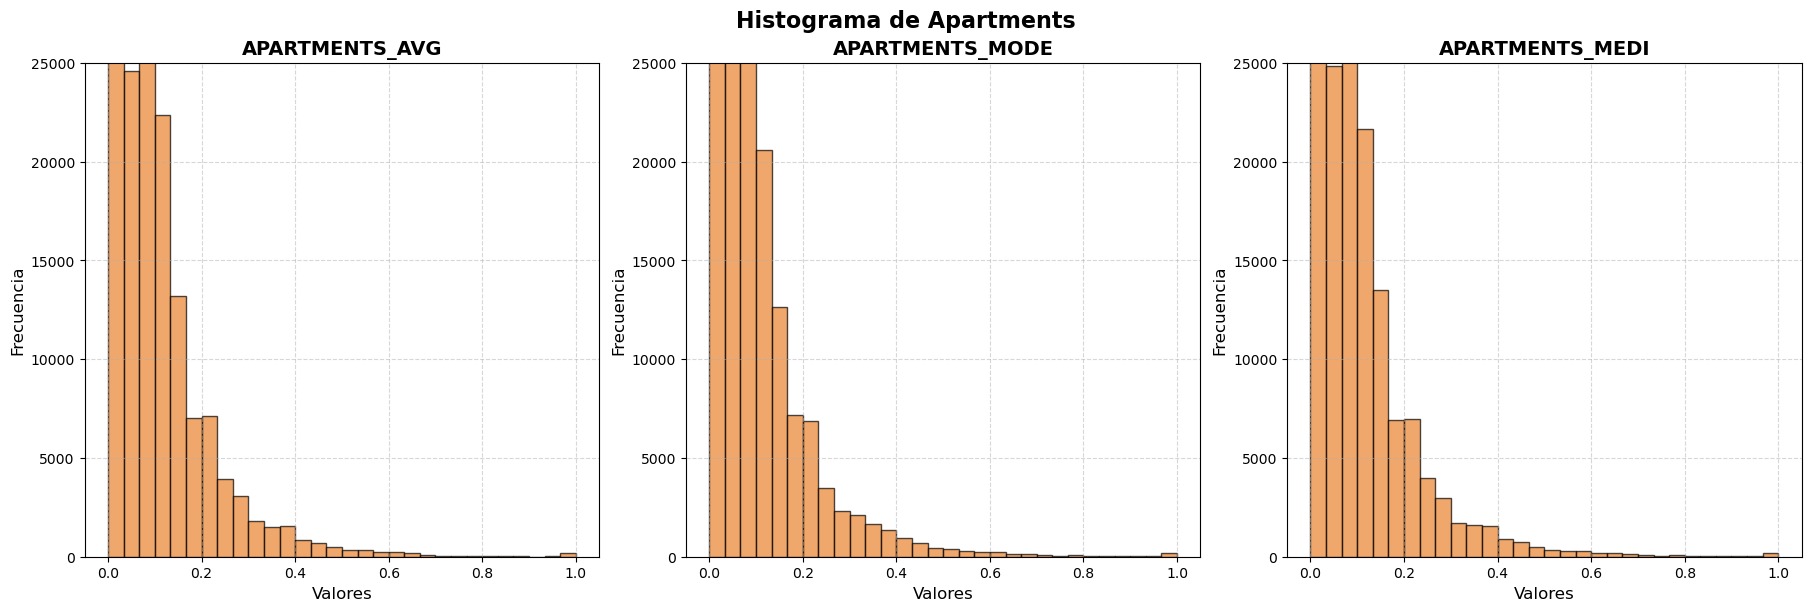

In [14]:
# 1. Grupo: "APARTMENTS"
apartment_variables = [
    "APARTMENTS_AVG", "APARTMENTS_MODE", "APARTMENTS_MEDI"
]

# Crear el gráfico para el grupo "APARTMENTS"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, apartment_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Apartments", fontsize=16, fontweight="bold")
plt.show()

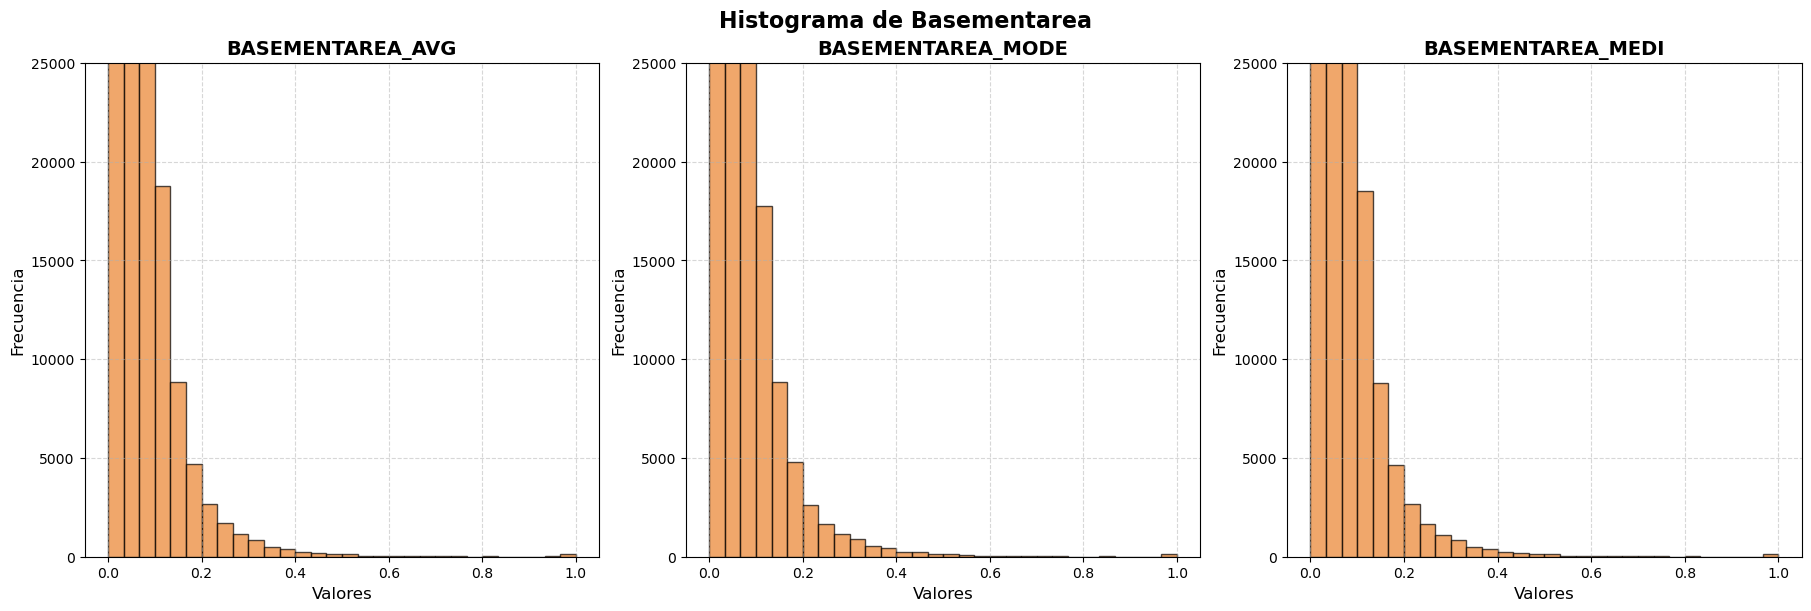

In [15]:
# 2. Grupo: "BASEMENTAREA"
basementarea_variables = [
    "BASEMENTAREA_AVG", "BASEMENTAREA_MODE", "BASEMENTAREA_MEDI"
]

# Crear el gráfico para el grupo "BASEMENTAREA"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, basementarea_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Basementarea", fontsize=16, fontweight="bold")
plt.show()

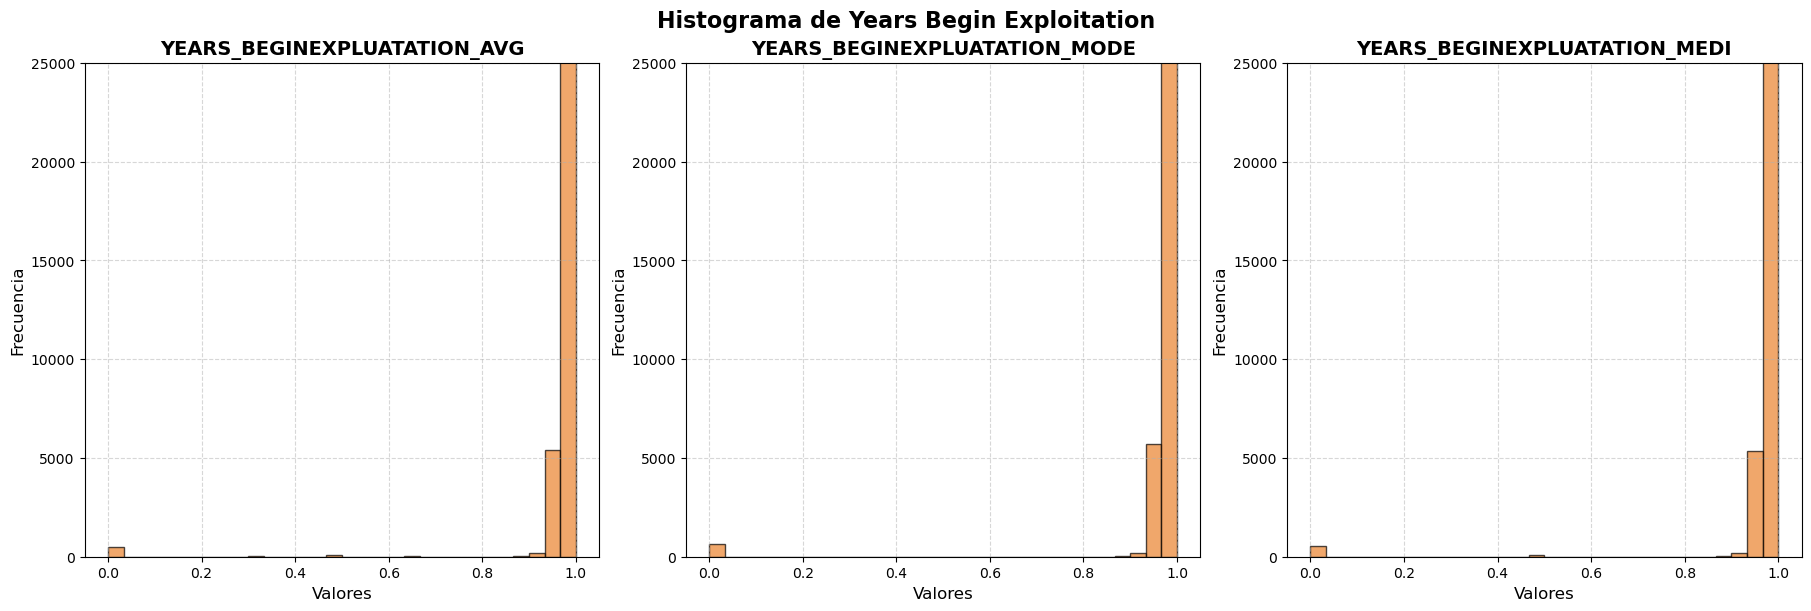

In [16]:
# 3. Grupo: "YEARS_BEGINEXPLUATATION"
years_beginexploitation_variables = [
    "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BEGINEXPLUATATION_MEDI"
]

# Crear el gráfico para el grupo "YEARS_BEGINEXPLUATATION"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, years_beginexploitation_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Years Begin Exploitation", fontsize=16, fontweight="bold")
plt.show()

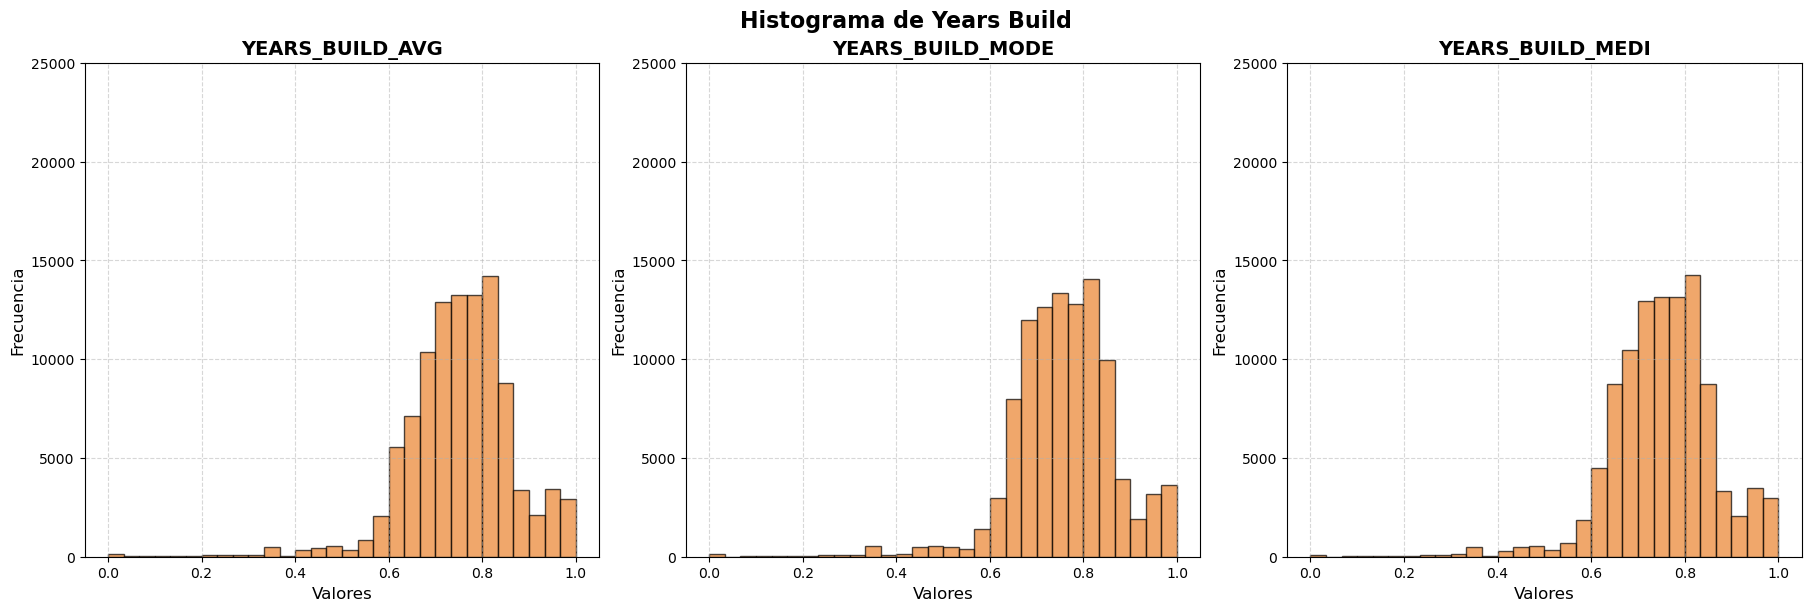

In [17]:
# 4. Grupo: "YEARS_BUILD"
years_build_variables = [
    "YEARS_BUILD_AVG", "YEARS_BUILD_MODE", "YEARS_BUILD_MEDI"
]

# Crear el gráfico para el grupo "YEARS_BUILD"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, years_build_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Years Build", fontsize=16, fontweight="bold")
plt.show()

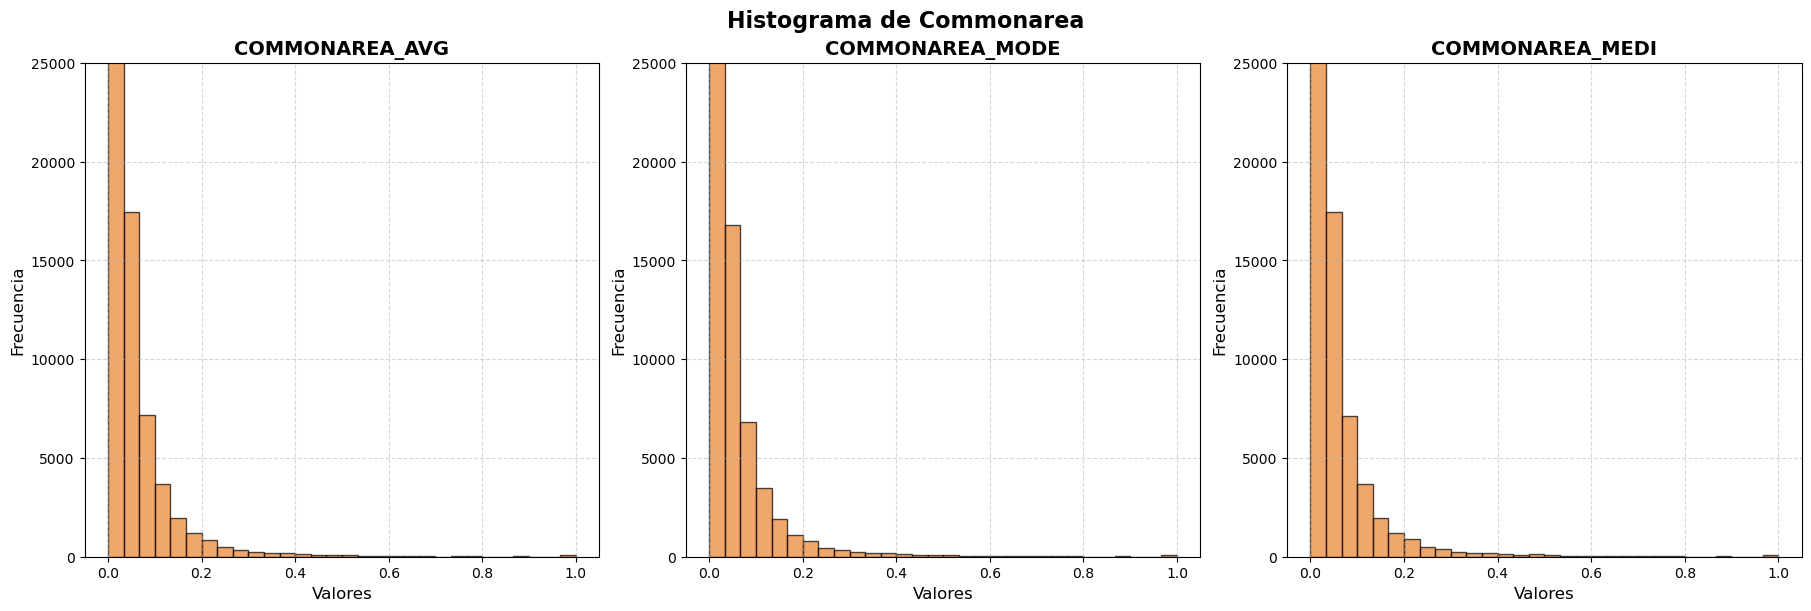

In [18]:
# 5. Grupo: "COMMONAREA"
commonarea_variables = [
    "COMMONAREA_AVG", "COMMONAREA_MODE", "COMMONAREA_MEDI"
]

# Crear el gráfico para el grupo "COMMONAREA"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, commonarea_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Commonarea", fontsize=16, fontweight="bold")
plt.show()

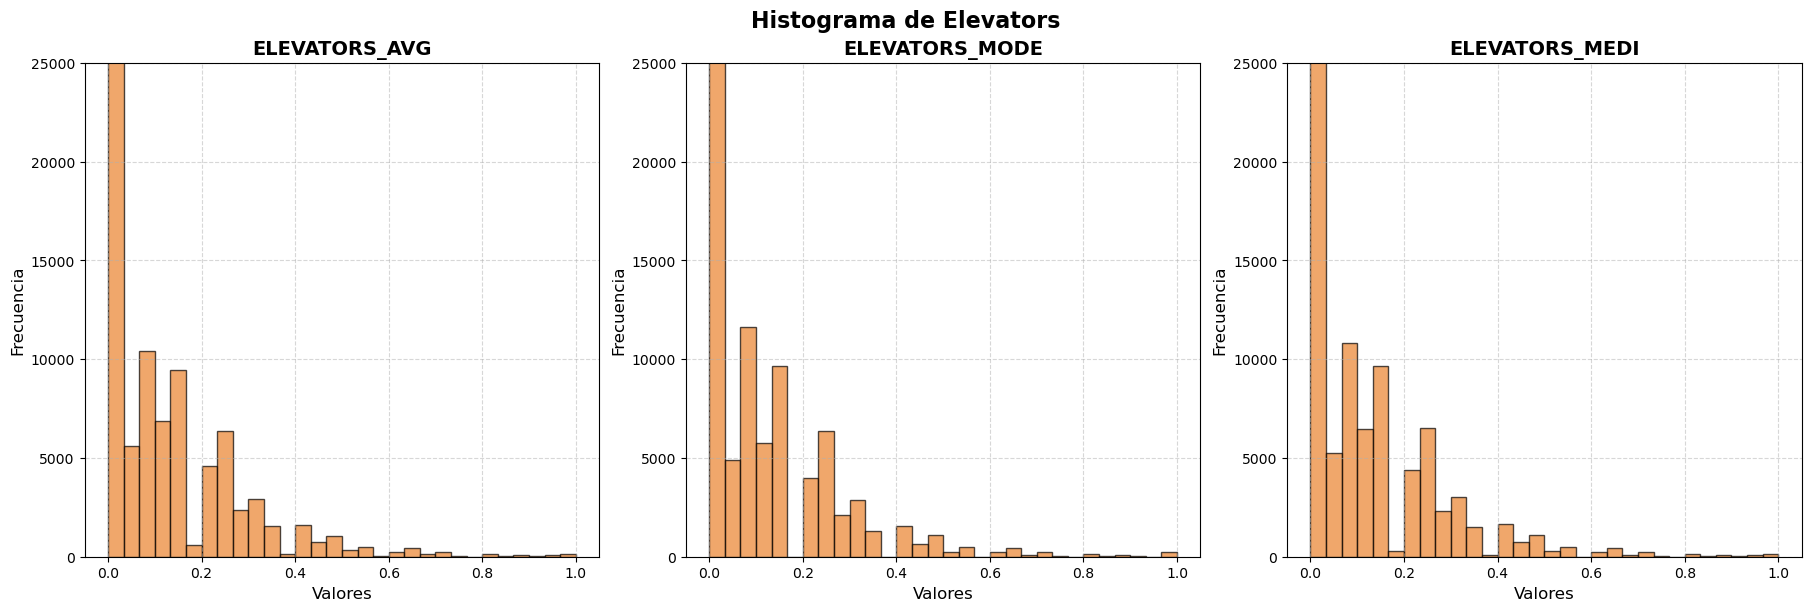

In [19]:
# 6. Grupo: "ELEVATORS"
elevators_variables = [
    "ELEVATORS_AVG", "ELEVATORS_MODE", "ELEVATORS_MEDI"
]

# Crear el gráfico para el grupo "ELEVATORS"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, elevators_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Elevators", fontsize=16, fontweight="bold")
plt.show()

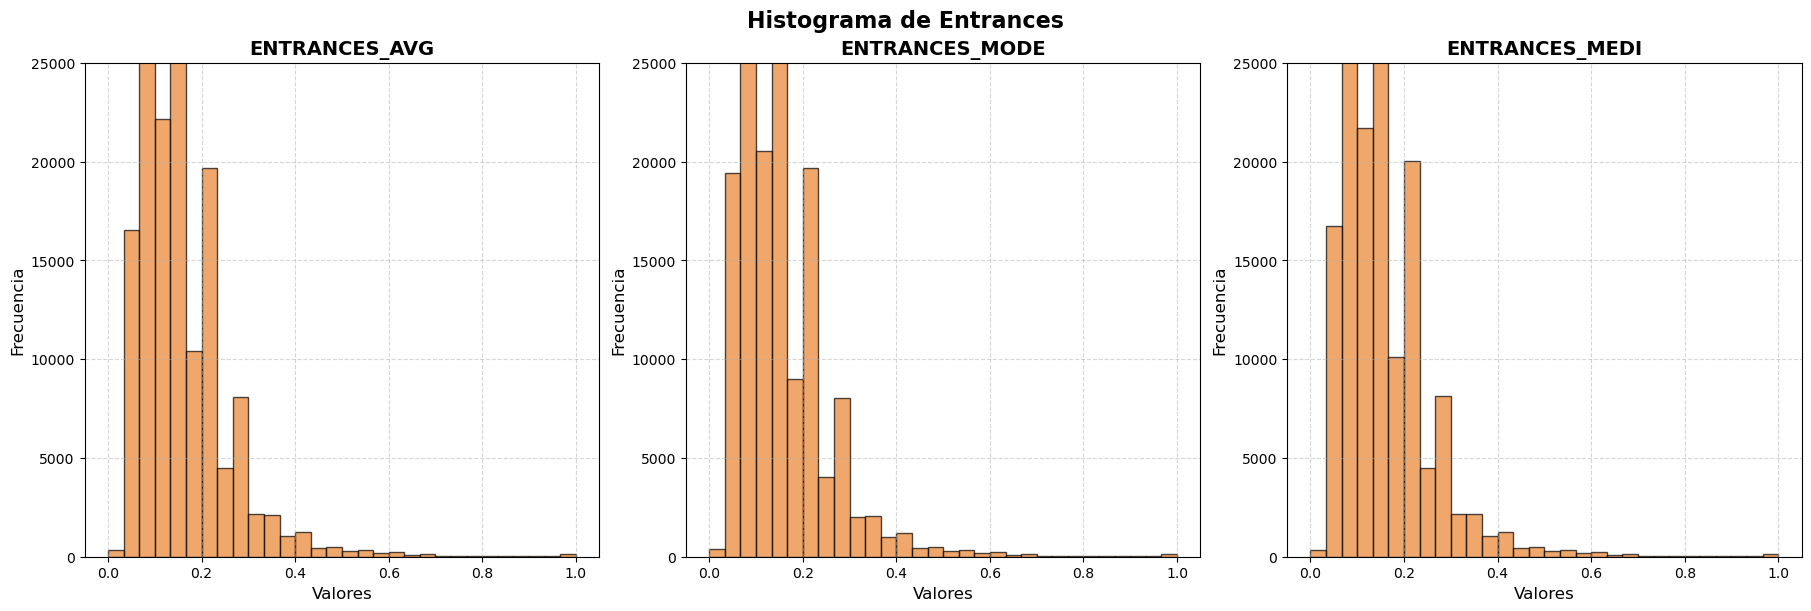

In [20]:
# 7. Grupo: "ENTRANCES"
entrances_variables = [
    "ENTRANCES_AVG", "ENTRANCES_MODE", "ENTRANCES_MEDI"
]

# Crear el gráfico para el grupo "ENTRANCES"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, entrances_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Entrances", fontsize=16, fontweight="bold")
plt.show()

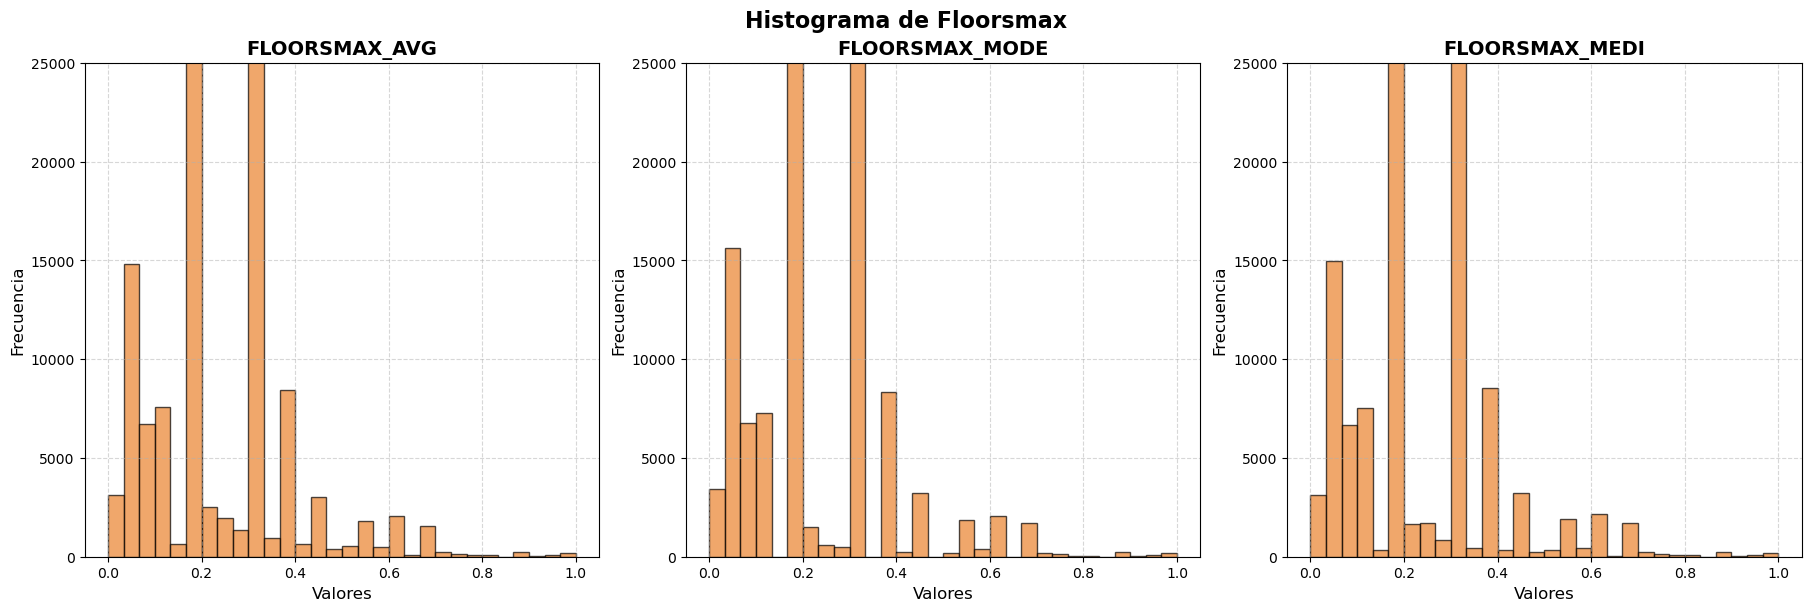

In [21]:
# 8. Grupo: "FLOORSMAX"
floorsmax_variables = [
    "FLOORSMAX_AVG", "FLOORSMAX_MODE", "FLOORSMAX_MEDI"
]

# Crear el gráfico para el grupo "FLOORSMAX"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, floorsmax_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Floorsmax", fontsize=16, fontweight="bold")
plt.show()

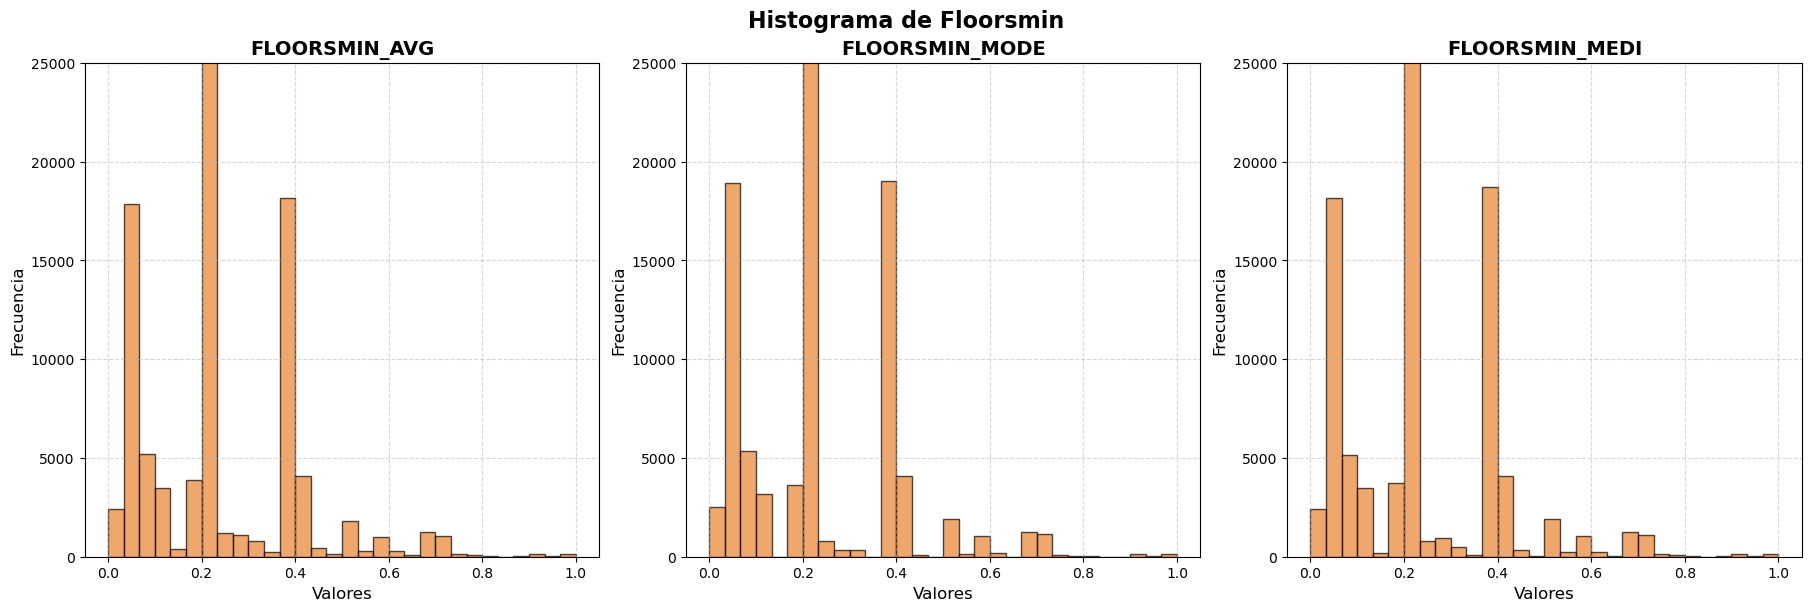

In [22]:
# 9. Grupo: "FLOORSMIN"
floorsmin_variables = [
    "FLOORSMIN_AVG", "FLOORSMIN_MODE", "FLOORSMIN_MEDI"
]

# Crear el gráfico para el grupo "FLOORSMIN"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, floorsmin_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Floorsmin", fontsize=16, fontweight="bold")
plt.show()


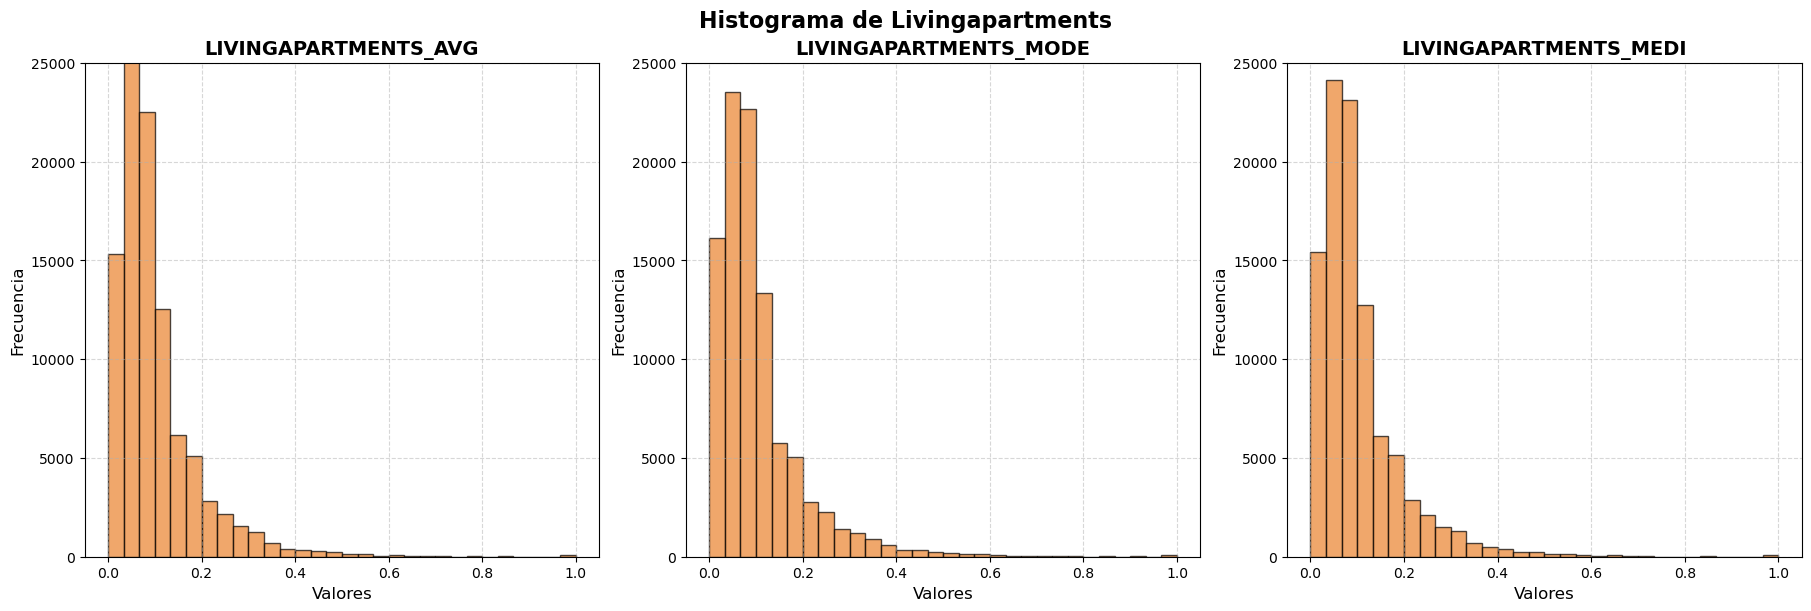

In [23]:
# 10. Grupo: "LIVINGAPARTMENTS"
livingapartments_variables = [
    "LIVINGAPARTMENTS_AVG", "LIVINGAPARTMENTS_MODE", "LIVINGAPARTMENTS_MEDI"
]

# Crear el gráfico para el grupo "LIVINGAPARTMENTS"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, livingapartments_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Livingapartments", fontsize=16, fontweight="bold")
plt.show()

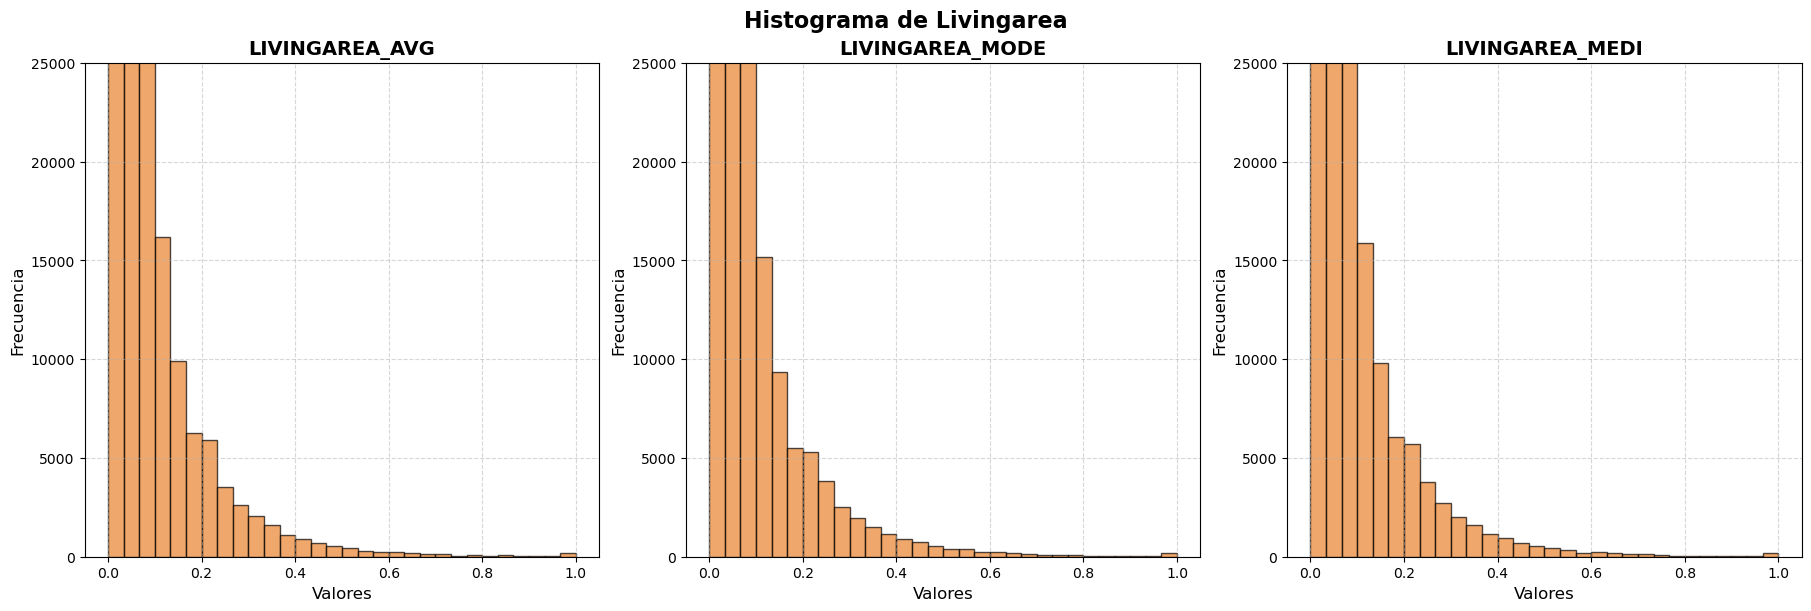

In [24]:
# 11. Grupo: "LIVINGAREA"
livingarea_variables = [
    "LIVINGAREA_AVG", "LIVINGAREA_MODE", "LIVINGAREA_MEDI"
]

# Crear el gráfico para el grupo "LIVINGAREA"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, livingarea_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Livingarea", fontsize=16, fontweight="bold")
plt.show()

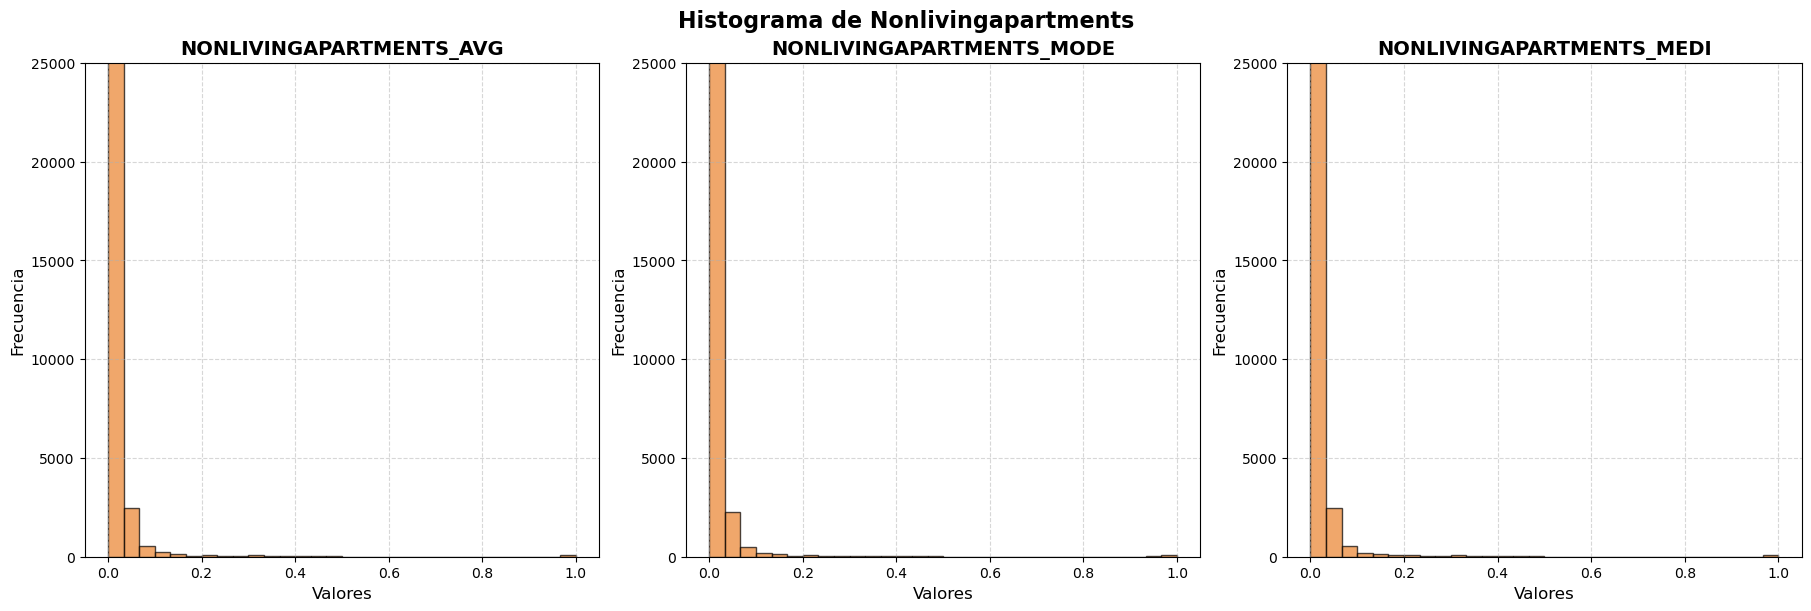

In [25]:
# 12. Grupo: "NONLIVINGAPARTMENTS"
nonlivingapartments_variables = [
    "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAPARTMENTS_MEDI"
]

# Crear el gráfico para el grupo "NONLIVINGAPARTMENTS"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, nonlivingapartments_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Nonlivingapartments", fontsize=16, fontweight="bold")
plt.show()

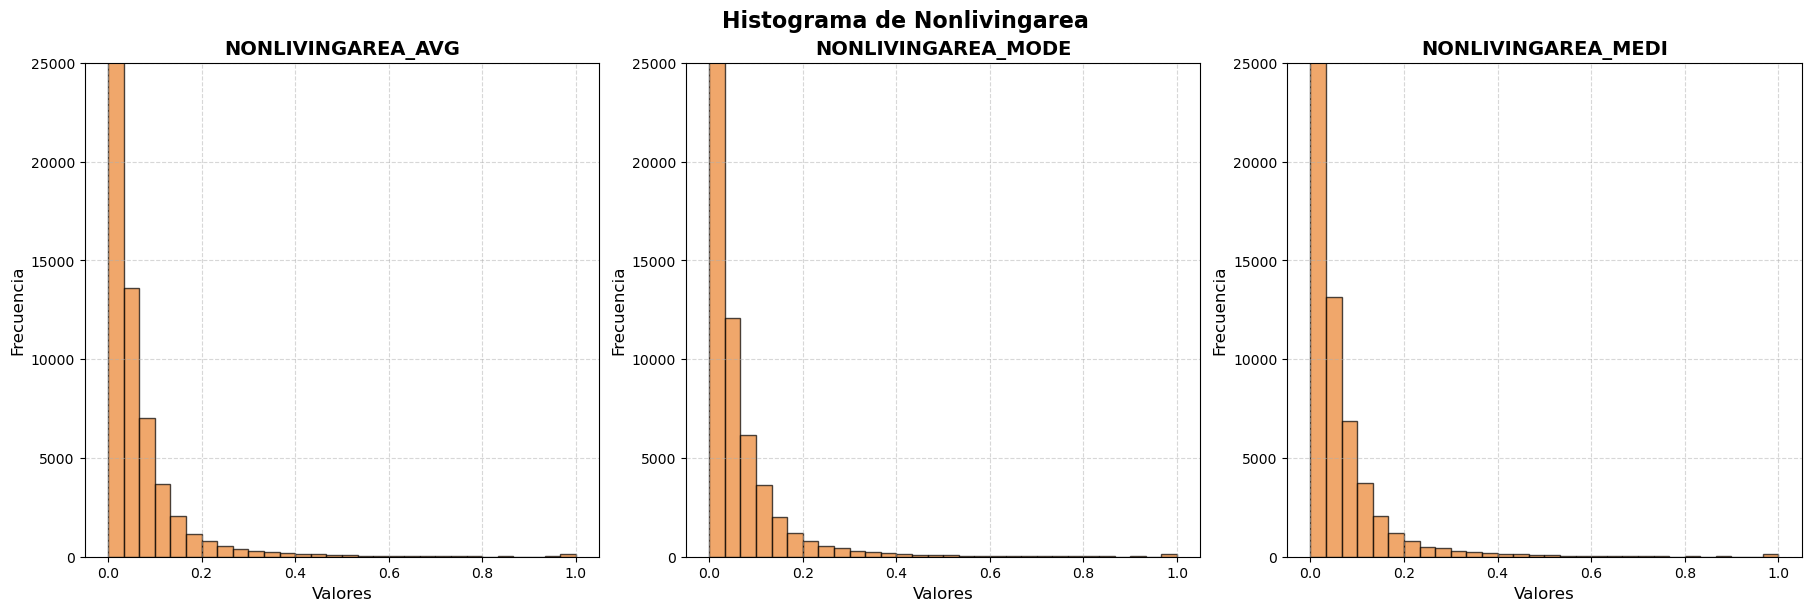

In [26]:
# 13. Grupo: "NONLIVINGAREA"
nonlivingarea_variables = [
    "NONLIVINGAREA_AVG", "NONLIVINGAREA_MODE", "NONLIVINGAREA_MEDI"
]

# Crear el gráfico para el grupo "NONLIVINGAREA"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, nonlivingarea_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Nonlivingarea", fontsize=16, fontweight="bold")
plt.show()

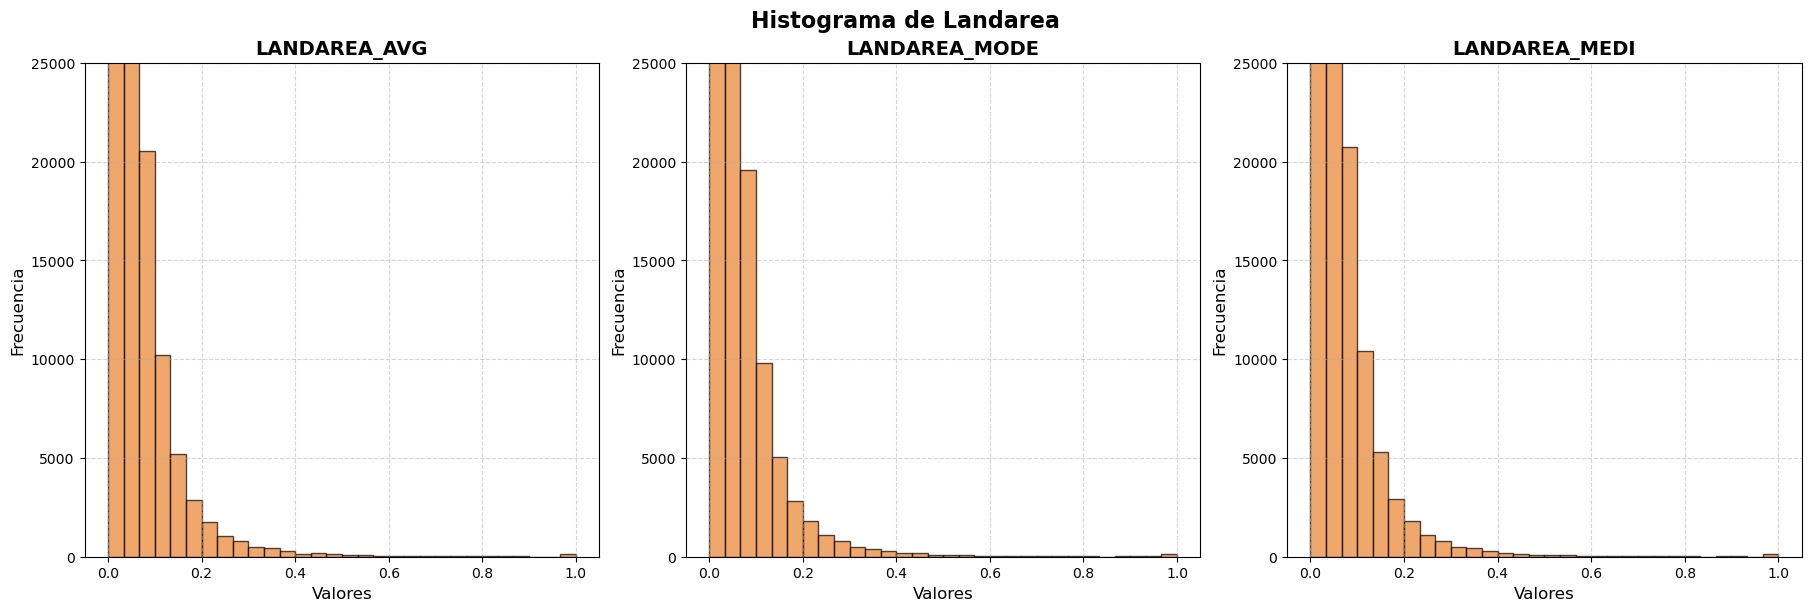

In [27]:
# 14. Grupo: "LANDAREA"
landarea_variables = [
    "LANDAREA_AVG", "LANDAREA_MODE", "LANDAREA_MEDI"
]

# Crear el gráfico para el grupo "LANDAREA"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, landarea_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_ylim(0, 25000)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Landarea", fontsize=16, fontweight="bold")
plt.show()

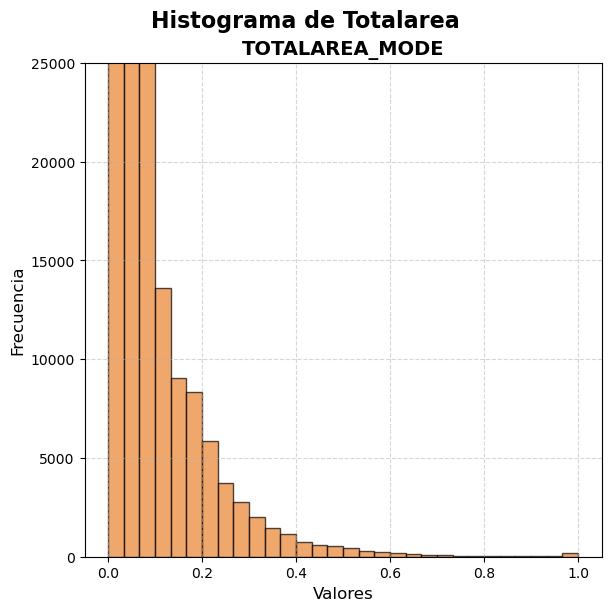

In [28]:
# 15. Grupo: "TOTALAREA"
totalarea_variables = [
    "TOTALAREA_MODE"
]

# Crear el gráfico para el grupo "TOTALAREA"
fig, axes = plt.subplots(1, 1, figsize=(6, 6), constrained_layout=True)
axes.hist(data[totalarea_variables[0]], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
axes.set_title(f"{totalarea_variables[0]}", fontsize=14, fontweight="bold")
axes.set_xlabel("Valores", fontsize=12)
axes.set_ylabel("Frecuencia", fontsize=12)
axes.set_ylim(0, 25000)
axes.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Totalarea", fontsize=16, fontweight="bold")
plt.show()


#### Sobre la aplicación al préstamo

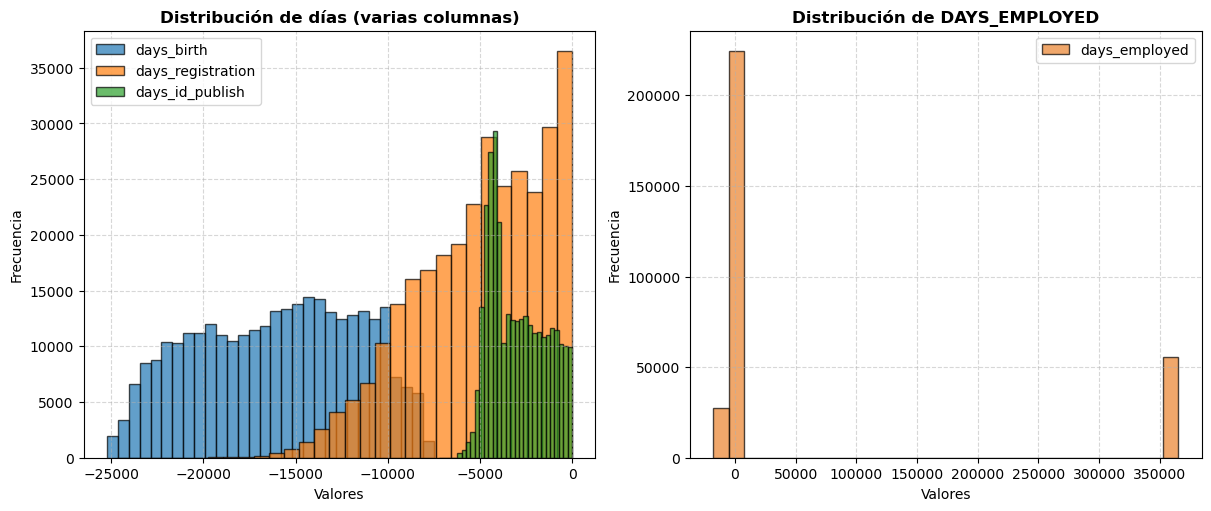

In [29]:
# Crear figura y dos axes en una fila, dos columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Gráfico de la izquierda: Múltiples variables
days_var = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
for var in days_var:
    axes[0].hist(data[var], bins=30, alpha=0.7, edgecolor="black", label=var.lower())
axes[0].set_title("Distribución de días (varias columnas)", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Valores", fontsize=10)
axes[0].set_ylabel("Frecuencia", fontsize=10)
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[0].legend()

# Gráfico de la derecha: Variable específica
axes[1].hist(data['DAYS_EMPLOYED'], bins=30, color="#EA822D", alpha=0.7, edgecolor="black", label='days_employed')
axes[1].set_title("Distribución de DAYS_EMPLOYED", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Valores", fontsize=10)
axes[1].set_ylabel("Frecuencia", fontsize=10)
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].legend()

# Mostrar la figura
plt.show()

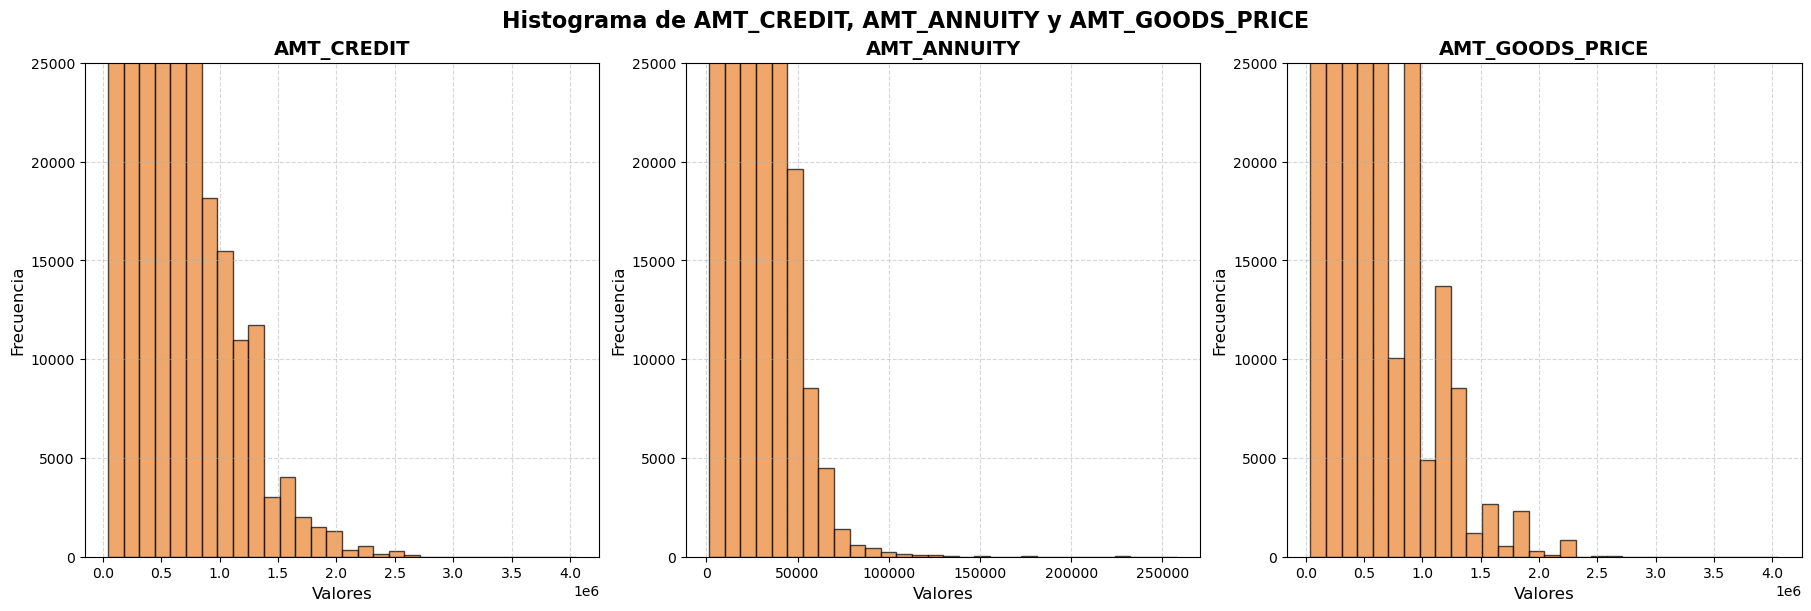

In [30]:
amt_variables = [
    "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"
]

# Crear la figura y los ejes (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, amt_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")  # Título con el nombre de la variable
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.set_ylim(0, 25000)  # Limitar el eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Título general para el grupo de variables
fig.suptitle("Histograma de AMT_CREDIT, AMT_ANNUITY y AMT_GOODS_PRICE", fontsize=16, fontweight="bold")

# Mostrar la figura
plt.show()

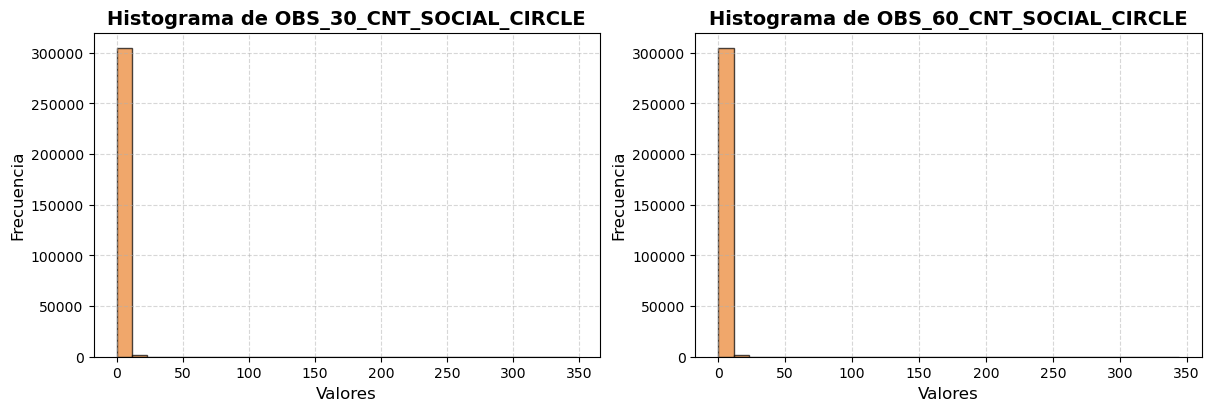

In [31]:
# Lista de variables
social_circle_variables = ["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, social_circle_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()


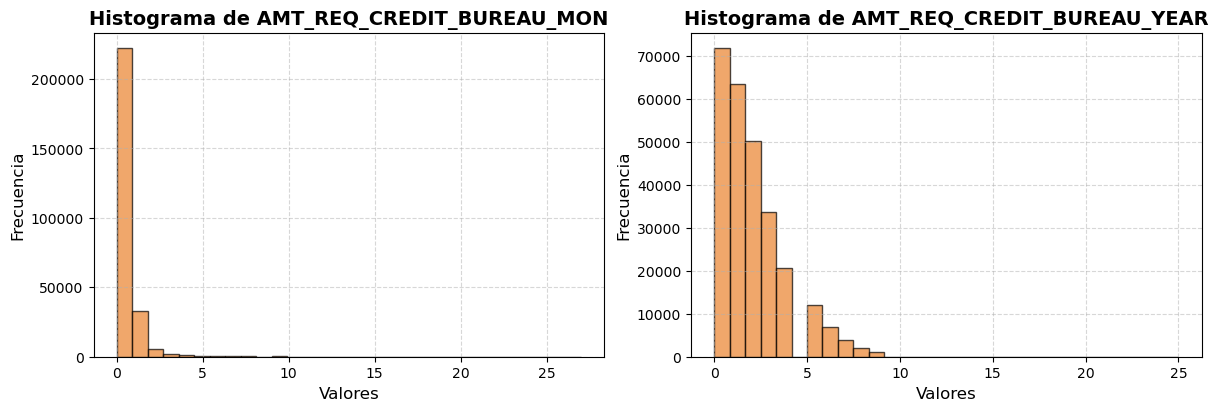

In [32]:
# Lista de variables
credit_bureau_variables = ["AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_YEAR"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, credit_bureau_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()


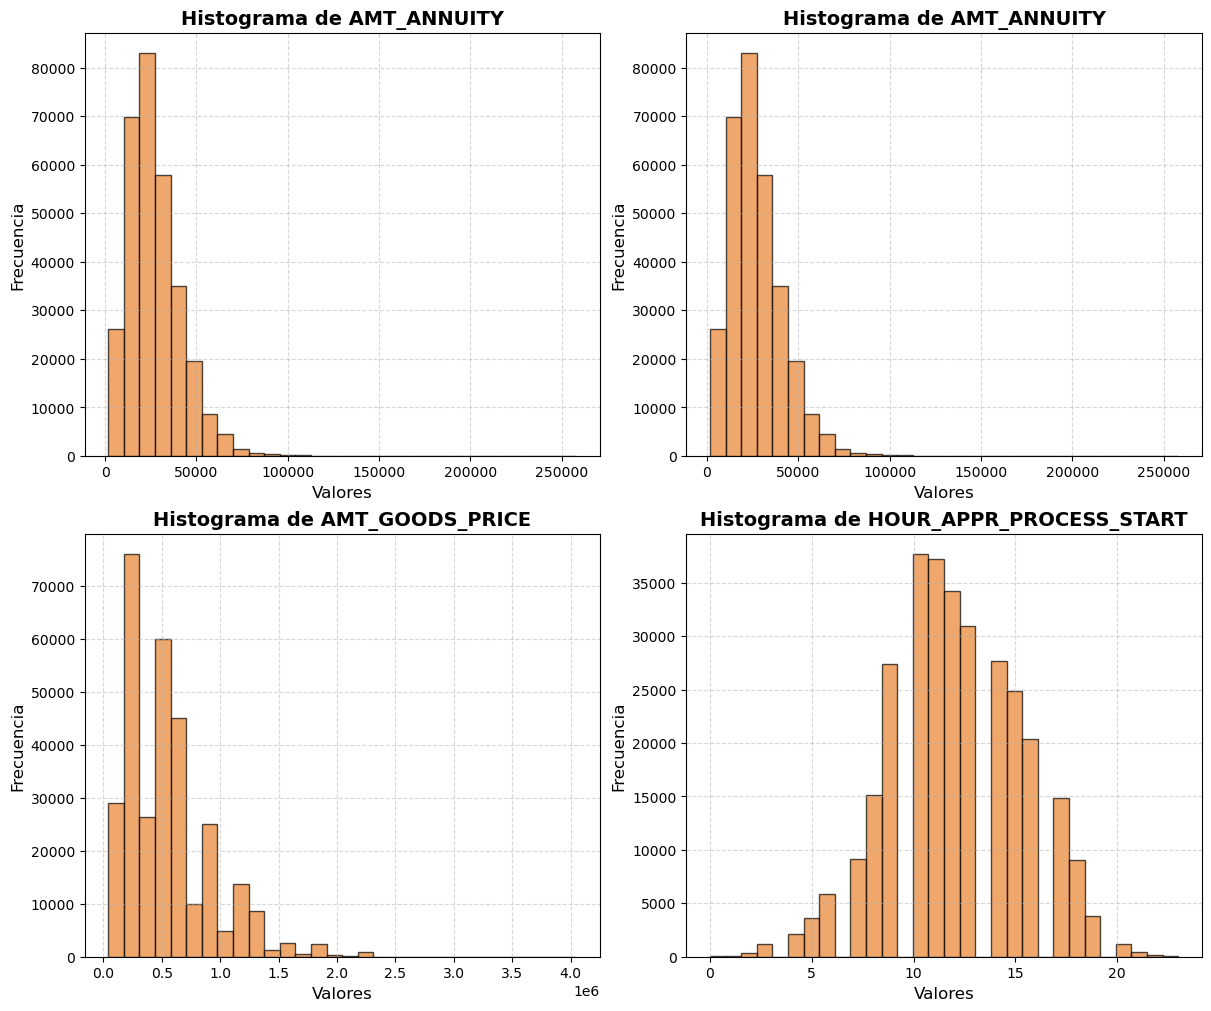

In [33]:
# Variables a graficar en un 2x2
variables_2x2 = [
    "AMT_ANNUITY", "AMT_ANNUITY", 
    "AMT_GOODS_PRICE", "HOUR_APPR_PROCESS_START"
]

# Crear figura y ejes (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes.flatten(), variables_2x2):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

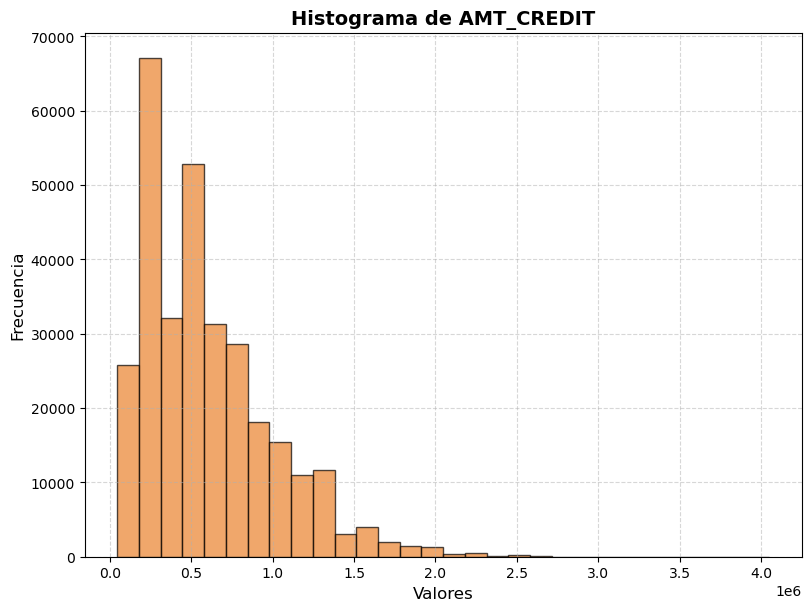

In [34]:
# Variable a graficar
amt_credit_variable = "AMT_CREDIT"

# Crear figura
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)

# Graficar el histograma
ax.hist(data[amt_credit_variable], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
ax.set_title(f"Histograma de {amt_credit_variable}", fontsize=14, fontweight="bold")  # Título del gráfico
ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

## Análisis bivariado

In [36]:
import numpy as np

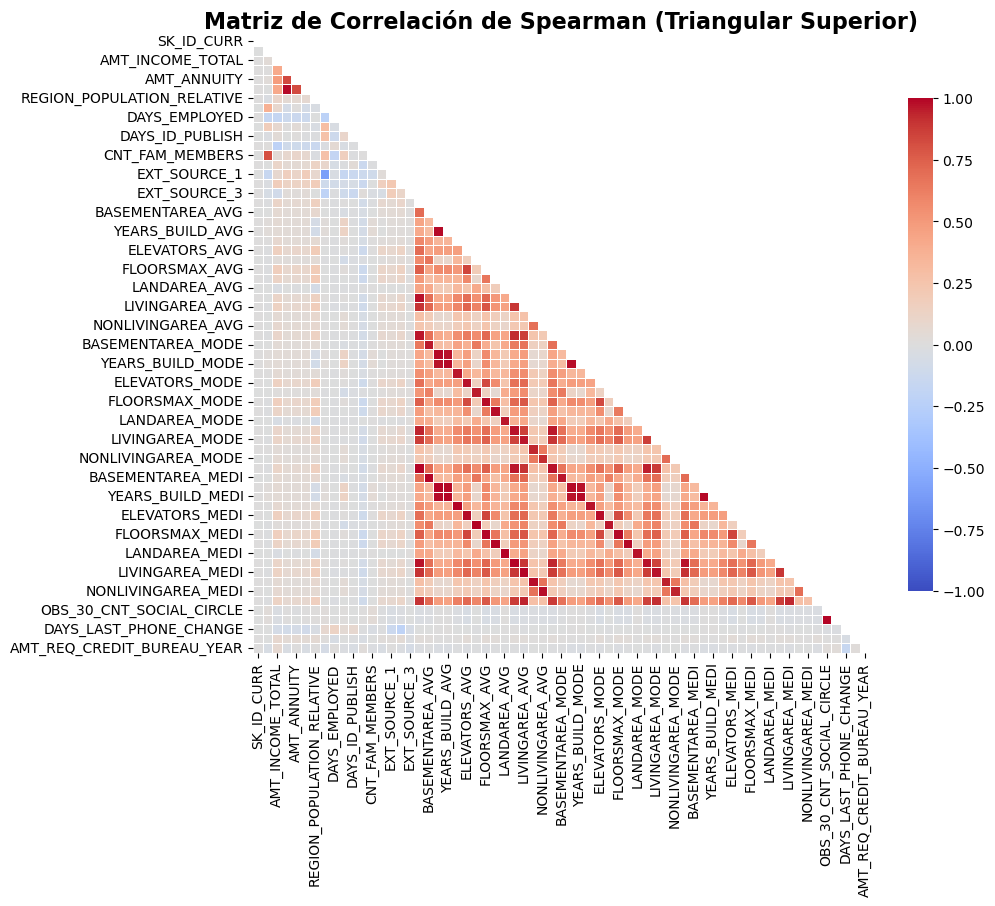

In [39]:
# Calcular la matriz de correlación de Spearman
corr_spearman = data[numeric_cols].corr(method='spearman')

# Crear una máscara para mostrar solo la parte triangular superior
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Crear el gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=False, cmap="coolwarm", mask=mask, 
            cbar_kws={"shrink": .8}, square=True, linewidths=0.5,
            vmin=-1, vmax=1)

# Mostrar el gráfico
plt.title("Matriz de Correlación de Spearman (Triangular Superior)", fontsize=16, fontweight="bold")
plt.show()